# **CH.SC.U4CSE23239 - Logistic Regression - Exercise 1**

In [2]:
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
import seaborn as sn

uploaded = files.upload()
data = pd.read_stata('binary.dta')
print(data.head())

Saving binary.dta to binary.dta
   admit    gre   gpa  rank
0    0.0  380.0  3.61   3.0
1    1.0  660.0  3.67   3.0
2    1.0  800.0  4.00   1.0
3    1.0  640.0  3.19   4.0
4    0.0  520.0  2.93   4.0


In [5]:
print(data.shape)
data.isnull().sum()

(400, 4)


,0
admit,0
gre,0
gpa,0
rank,0


In [6]:
feature_col = ['gre','gpa','rank']
x = data[feature_col]
y = data.admit
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=35)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(320, 3)

(320,)

(80, 3)

(80,)

In [7]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [8]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix : ', conf_mat)
Accuracy_score = metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score : ', Accuracy_score)
print('Accuracy in Percentage : ', int(Accuracy_score*100),'%')

Confusion Matrix :  [[44  5]
 [23  8]]
Accuracy Score :  0.65
Accuracy in Percentage :  65 %


<Axes: xlabel='Predicted', ylabel='Actual'>

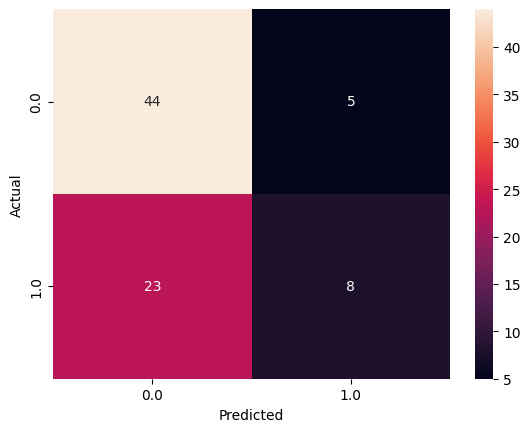

In [9]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)